C:\Users\北极星polaris\AppData\Local\Temp\ipykernel_30592\205268483.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  f.tight_layout() # 自动紧凑布局
C:\Users\北极星polaris\AppData\Local\Temp\ipykernel_30592\205268483.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  f.tight_layout() # 自动紧凑布局
C:\Users\北极星polaris\AppData\Local\Temp\ipykernel_30592\205268483.py:49: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self.canvas.draw()  # 以前的版本使用show()方法，matplotlib 2.2之后不再推荐show（）用draw代替，但是用show不会报错，会显示警告
C:\Users\北极星polaris\AppData\Local\Temp\ipykernel_30592\205268483.py:49: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self.canvas.draw()  # 以前的版本使用show()方法，matplotlib 2.2之后不再推荐show（）用draw代替，但是用show不会报错，会显示警告
C:\Users\北极星polaris\AppData\Local\Temp\ipykernel_30592\205268483.py:49: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self.canvas.draw()  # 以前的版本使用show()方法，matplotlib 2.2之后不再推荐

NameError: name 'runFlag' is not defined

C:\Users\北极星polaris\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\北极星polaris\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\北极星polaris\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\北极星polaris\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\北极星polaris\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current fon

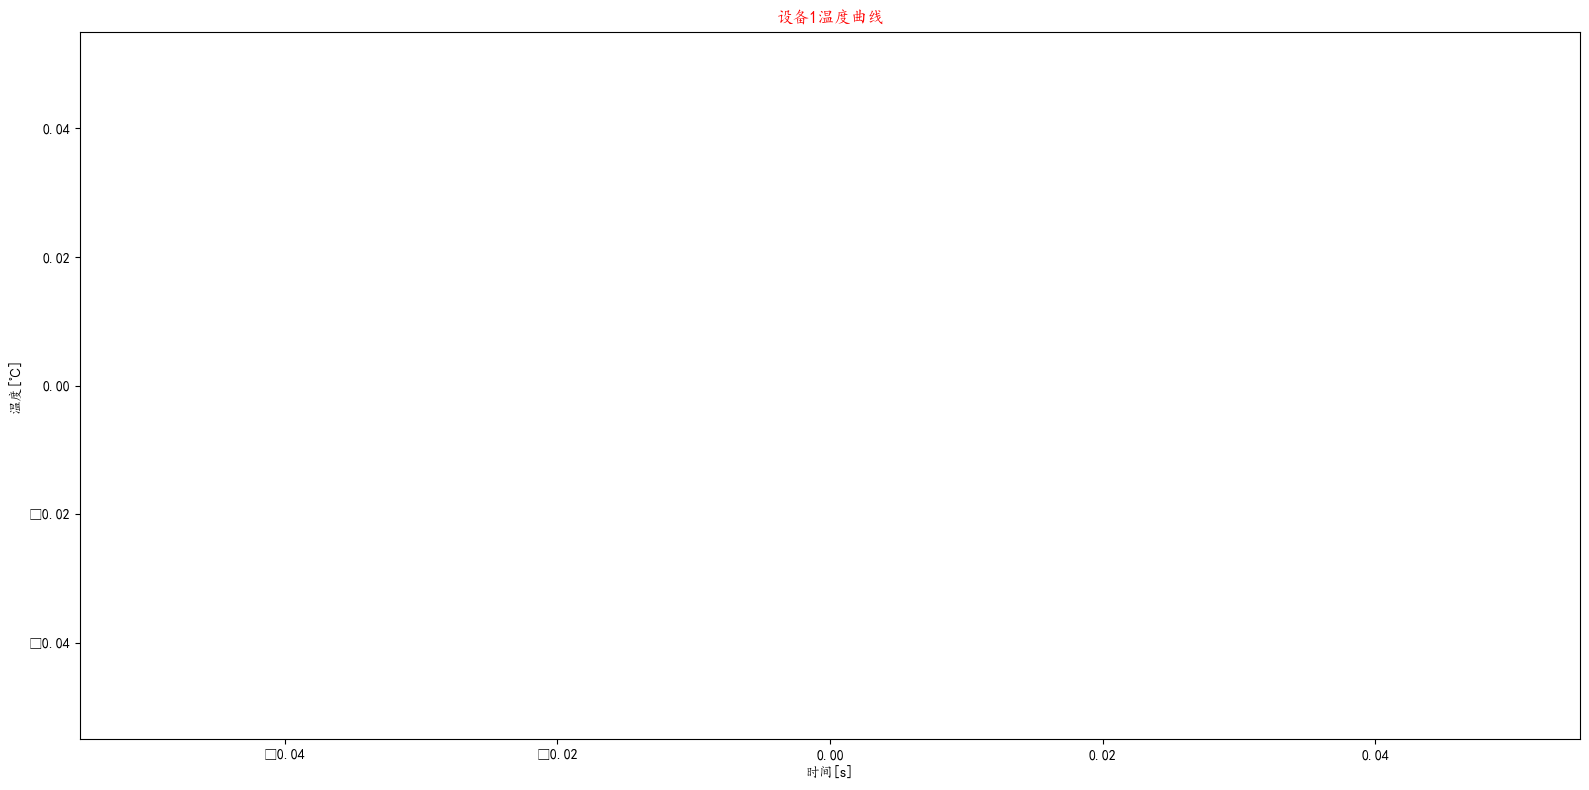

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import datetime
import PySimpleGUI as sg
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import tkinter as tk
import time,sys
import threading

mpl.rcParams['font.sans-serif'] = ['KaiTi']
# plot函数的汉字字体
mpl.rcParams['font.serif'] = ['KaiTi']

titles=['七彩虹RTX3090 AD OC',"七彩虹RTX3080Ti AD OC","七彩虹RTX3080 AD OC",
        "七彩虹RTX3070Ti AD OC","七彩虹RTX3070 战斧 LHR","七彩虹RTX3060Ti AD OC",
        "七彩虹RTX3060 AD OC","七彩虹RTX3050 Ultra W DUO OC","七彩虹RTX2060 ",
        "七彩虹RTX2060 SUPER"]

class tempGraph():
    def __init__(self, root):
        self.root = root  # 主窗体
        self.canvas = tk.Canvas()  # 创建一块显示图形的画布
        self.figure = self.create_matplotlib()  # 返回matplotlib所画图形的figure对象
        self.showGraphIn(self.figure)  # 将figure显示在tkinter窗体上面

    '''生成fig'''
    def create_matplotlib(self):
        # 创建绘图对象f
        f = plt.figure(num=2, figsize=(16, 8), dpi=100, edgecolor='green', frameon=True)
        # 创建一副子图
        self.fig11 = plt.subplot(1, 1, 1)
        self.line11, = self.fig11.plot([], [])

        def setLabel(fig, title, titleColor="red"):
            fig.set_title(title+"温度曲线", color=titleColor)  # 设置标题
            fig.set_xlabel('时间[s]')  # 设置x轴标签
            fig.set_ylabel("温度[℃]") # 设置y轴标签
        setLabel(self.fig11, "设备1")
        # fig1.set_yticks([-1, -1 / 2, 0, 1 / 2, 1])  # 设置坐标轴刻度
        f.tight_layout() # 自动紧凑布局
        return f

    '''把fig显示到tkinter'''
    def showGraphIn(self, figure):
        # 把绘制的图形显示到tkinter窗口上
        self.canvas = FigureCanvasTkAgg(figure, self.root)
        self.canvas.draw()  # 以前的版本使用show()方法，matplotlib 2.2之后不再推荐show（）用draw代替，但是用show不会报错，会显示警告
        self.canvas.get_tk_widget().pack(side=tk.TOP) #, fill=tk.BOTH, expand=1

        # 把matplotlib绘制图形的导航工具栏显示到tkinter窗口上
        toolbar = NavigationToolbar2Tk(self.canvas,
                                        self.root)  # matplotlib 2.2版本之后推荐使用NavigationToolbar2Tk，若使用NavigationToolbar2TkAgg会警告
        toolbar.update()
        self.canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    '''更新fig'''
    def updateMeltGraph(self, meltData):
        x = [i for i in range(len(meltData))]
        self.line11.set_xdata(x) # x轴也必须更新
        self.line11.set_ydata(meltData)  # 更新y轴数据
        #  更新x数据，但未更新绘图范围。当我把新数据放在绘图上时，它完全超出了范围。解决办法是增加：
        self.fig11.relim()
        self.fig11.autoscale_view()
        plt.draw()
        # self.canvas.draw_idle()

def updataData():
    global tempData,runFlag
    while runFlag:
        tempData.append(5)
        time.sleep(1)
def updateWindow():
    global win
    global tempGraphLabel, tempData, runFlag
    if runFlag:
        tempGraphLabel.updateMeltGraph(tempData)
    win.after(1000, updateWindow)  # 1000ms更新画布
def closeWindow():
    global runFlag
    runFlag = False
    sys.exit()
def createGUI():
    global win
    win = tk.Tk()
    displayWidth = win.winfo_screenwidth()  # 获取屏幕宽度
    displayHeight = win.winfo_screenheight()
    winWidth, winHeight = displayWidth, displayHeight - 70
    winX, winY = -8, 0
    # winX, winY = int((displayWidth - winWidth) /
    #                  2), int((displayHeight - winHeight - 70) / 2)
    win.title("窗口标题")
    win.geometry(
        '%dx%d-%d+%d' %
        (winWidth,
        winHeight,
        winX, winY))  # %dx%d宽度x 高度+横向偏移量(距左边)+纵向偏移量(距上边)
    # win.resizable(0, 0) # 不使能最大化
    win.protocol("WM_DELETE_WINDOW", closeWindow)
    # win.iconbitmap(r'resource/images/motor.ico')  # 窗口图标

    graphFrame = tk.Frame(win) # 创建图表控件
    graphFrame.place(x=0, y=0)
    global tempGraphLabel
    tempGraphLabel = tempGraph(graphFrame)

    recv_data = threading.Thread(target=updataData)  # 开启线程
    recv_data.start()

    updateWindow()  # 更新画布
    win.mainloop()

def datestr2num(s):
    return datetime.datetime.strptime(s.decode('utf-8'), '%m/%d/%Y').weekday()#utf8解码 month day Year
#对数据进行转化 

def shows(x,y):
    global counts
    
    #设置画布大小
    plt.figure(figsize=(20,8),dpi=80)
    plt.plot(x,y)   

#设置x的刻度
    _xticks_labels =["{}".format(i) for i in x]
    plt.xticks(x,_xticks_labels,rotation=45)
#绘制网络
    plt.grid()
#添加描述信息
    plt.xlabel("日期")
    plt.ylabel("价格")
    plt.title(titles[counts])
#展示
    plt.show()
    counts+=1

def anylist():
    data = pd.read_csv('显卡价格数据分析.csv')
    print(data.describe())
    x = data['日期']
    y1=data['七彩虹RTX3090 AD OC']
    y2=data["七彩虹RTX3080Ti AD OC"]
    y3=data["七彩虹RTX3080 AD OC"]
    y4=data["七彩虹RTX3070Ti AD OC"]
    y5=data["七彩虹RTX3070 战斧 LHR"]
    y6=data["七彩虹RTX3060Ti AD OC"]
    y7=data["七彩虹RTX3060 AD OC"]
    y8=data["七彩虹RTX3050 Ultra W DUO OC"]
    y9=data["七彩虹RTX2060 "]
    y10=data["七彩虹RTX2060 SUPER"]
    
    shows(x,y1)
    shows(x,y2)
    shows(x,y3)
    shows(x,y4)
    shows(x,y5)
    shows(x,y6)
    shows(x,y7)
    shows(x,y8)
    shows(x,y9)
    shows(x,y10)

counts=0

if __name__ == '__main__':
    createGUI()



'''
layout = [[sg.Text('欢迎使用显卡价格分析程序')],
        [sg.Text("Result:"), sg.Text(key='-OUTPUT-')],
        [sg.Button('next', key="-NEXT-"), sg.Button('Exit', key="-EXIT-")]]
window = sg.Window('显卡价格分析程序', layout)

while True:
    event, values = window.read()
    print(event, values)
    if event == sg.WIN_CLOSED or event == '-EXIT-':
        break
    if event == '-NEXT-':
        window['-OUTPUT-'].update(anylist())

window.close()
anylist()'''
